# Visualizing empath data on reddit communities

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

from empath import Empath
lexicon = Empath()

In [4]:
with open("./../data/reddit/cm/analysis/empath.csv", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

In [9]:
df.drop(columns='Comment', inplace=True)
df.drop(columns='ID',inplace=True)
df.drop(columns='Author',inplace=True)
df.drop(columns='Score',inplace=True)
df.drop(columns='Parent id',inplace=True)

In [9]:
df.head(2)

,ID,Comment,Author,Score,Parent id,Publish Date,num,year,month,subreddit,...,suffering,dispute,anger,envy,work,politics,terrorism,shame,confusion,hate
0,c5ef264,Statism and socialism are intrinsically anti-m...,gege33,3,t3_wlomv,2012-07-15 16:49:37,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,0.0,0.0,0.019231
1,c5efzo9,I heard he only accepts payment in bitcoins too.,[deleted],3,t1_c5efqp9,2012-07-15 18:01:38,1,2012,2012-07,MGTOW,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


## Time visualization of empath by community

In [11]:
MGTOW_df = df[df.subreddit == 'MGTOW']

In [ ]:
MGTOW_df['Publish Date'] = pd.to_datetime(MGTOW_df['Publish Date'])
MGTOW_df['year'] = MGTOW_df['Publish Date'].dt.year
MGTOW_df['year'] = MGTOW_df['year'].mask(MGTOW_df['year'] < 2015)
MGTOW_df['year'] = MGTOW_df['year'].fillna(2014)

* Remember that "2014" represents the bar from all the years before 2015, in this case: 2014, 2013, 2012 

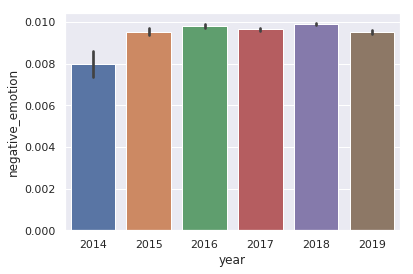

In [77]:
ax = sns.barplot(x="year", y="negative_emotion", data=MGTOW_df)

In [80]:
thtrp_df = df[df.subreddit == 'thankTRP']
thtrp_df = thtrp_df.astype({"year": int})
thtrp_df['Publish Date'] = pd.to_datetime(thtrp_df['Publish Date'])
thtrp_df['year'] = thtrp_df['Publish Date'].dt.year

In [84]:
thtrp_df.head(1)

,ID,Comment,Author,Score,Parent id,Publish Date,num,year,month,subreddit,...,suffering,dispute,anger,envy,work,politics,terrorism,shame,confusion,hate
7651127,cf40d39,Good idea pillburt.,GaiusScaevolus,3,t3_1wo8xk,2014-01-31 21:59:48,1,2014,2014-01,thankTRP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


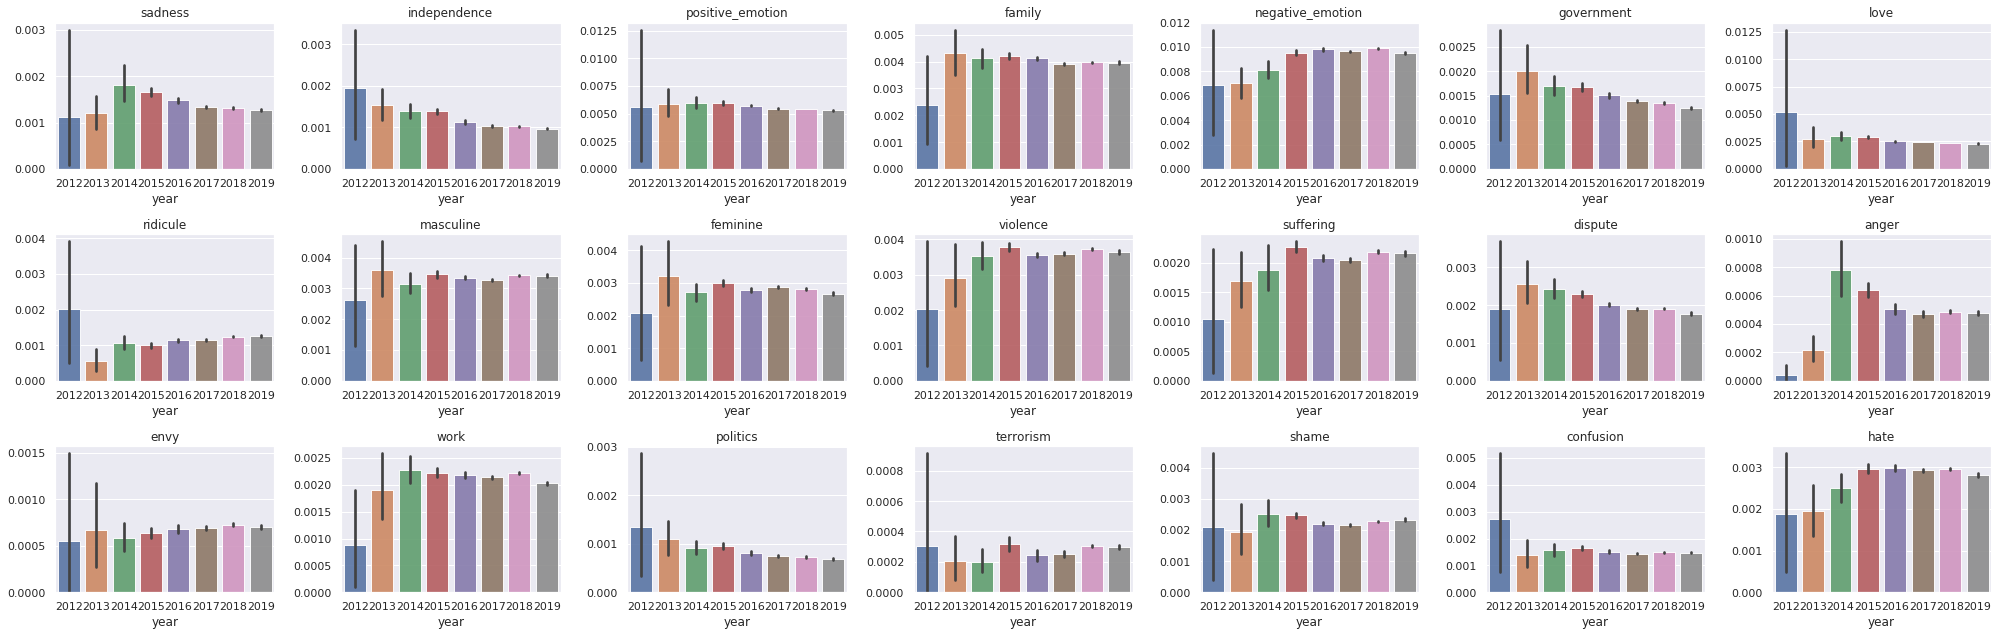

In [95]:
nr_rows = 3
nr_cols = 7

empath_list = ['sadness', 'independence', 'positive_emotion', 'family',
                'negative_emotion', 'government', 'love', 'ridicule',
                'masculine', 'feminine', 'violence', 'suffering',
                'dispute', 'anger', 'envy', 'work', 'politics',
                'terrorism', 'shame', 'confusion', 'hate']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

for r in range(0,nr_rows):
    for c in range(0, nr_cols):  
        col = r*nr_cols+c
        if col < len(empath_list):
            sns.set(style="darkgrid")
            sns.barplot(x="year", y=empath_list[col], alpha=0.9,ax = axs[r][c], data=MGTOW_df)
            axs[r][c].set_ylabel('')
            axs[r][c].set_title(empath_list[col])

            
plt.tight_layout()
plt.savefig('MGTOW_empath2.png')
plt.show()

In [6]:
MR_subreddits = ['LadyMRAs', 'FeMRADebates', 'Masculism', 'MensRants', 'FeMRA', 'MRActivism',
                 'MensRightsLaw', 'MRRef']  # removed againstmansrights

Incel_subreddits = ['askanincel', 'BlackPillScience', 'IncelsWithoutHate', 'Braincels']

MGTOW_subreddits = ['MGTOW']

RedPill_subreddits = ['RedPillParenting', 'TRPOffTopic', 'GEOTRP', 'thankTRP', 'redpillbooks',
                      'becomeaman', 'RedPillWomen', 'TheBluePill', 'asktrp', 'TheRedPill']  # removed exredpill

In [12]:
MR_df = df.loc[df['subreddit'].isin(MR_subreddits)]

In [98]:
MR_df = MR_df.astype({"year": int})
MR_df['Publish Date'] = pd.to_datetime(MR_df['Publish Date'])
MR_df['year'] = MR_df['Publish Date'].dt.year
MR_df['year'] = MR_df['year'].mask(MR_df['year'] < 2015)
MR_df['year'] = MR_df['year'].fillna(2014)

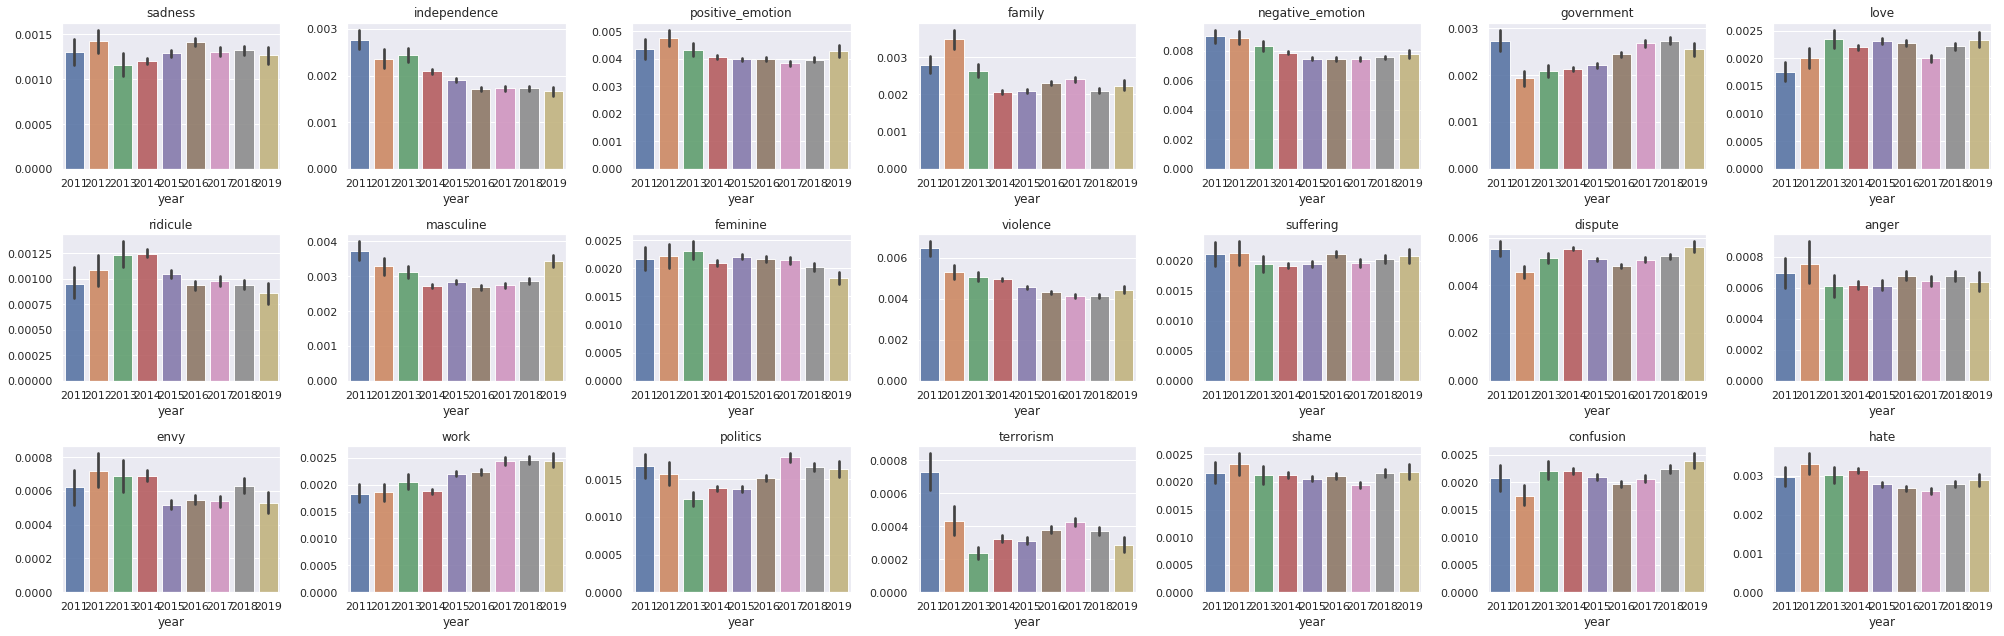

In [99]:
nr_rows = 3
nr_cols = 7

empath_list = ['sadness', 'independence', 'positive_emotion', 'family',
                'negative_emotion', 'government', 'love', 'ridicule',
                'masculine', 'feminine', 'violence', 'suffering',
                'dispute', 'anger', 'envy', 'work', 'politics',
                'terrorism', 'shame', 'confusion', 'hate']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

for r in range(0,nr_rows):
    for c in range(0, nr_cols):  
        col = r*nr_cols+c
        if col < len(empath_list):
            sns.set(style="darkgrid")
            sns.barplot(x="year", y=empath_list[col], alpha=0.9,ax = axs[r][c], data=MR_df)
            axs[r][c].set_ylabel('')
            axs[r][c].set_title(empath_list[col])

            
plt.tight_layout()
plt.savefig('MR_empath2.png')
plt.show()

In [14]:
RedPill_df = df.loc[df['subreddit'].isin(RedPill_subreddits)]

In [20]:
RedPill_df = RedPill_df.astype({"year": int})
RedPill_df['Publish Date'] = pd.to_datetime(RedPill_df['Publish Date'])
RedPill_df['year'] = RedPill_df['Publish Date'].dt.year
RedPill_df['year'] = RedPill_df['year'].mask(RedPill_df['year'] < 2015)
RedPill_df['year'] = RedPill_df['year'].fillna(2014)

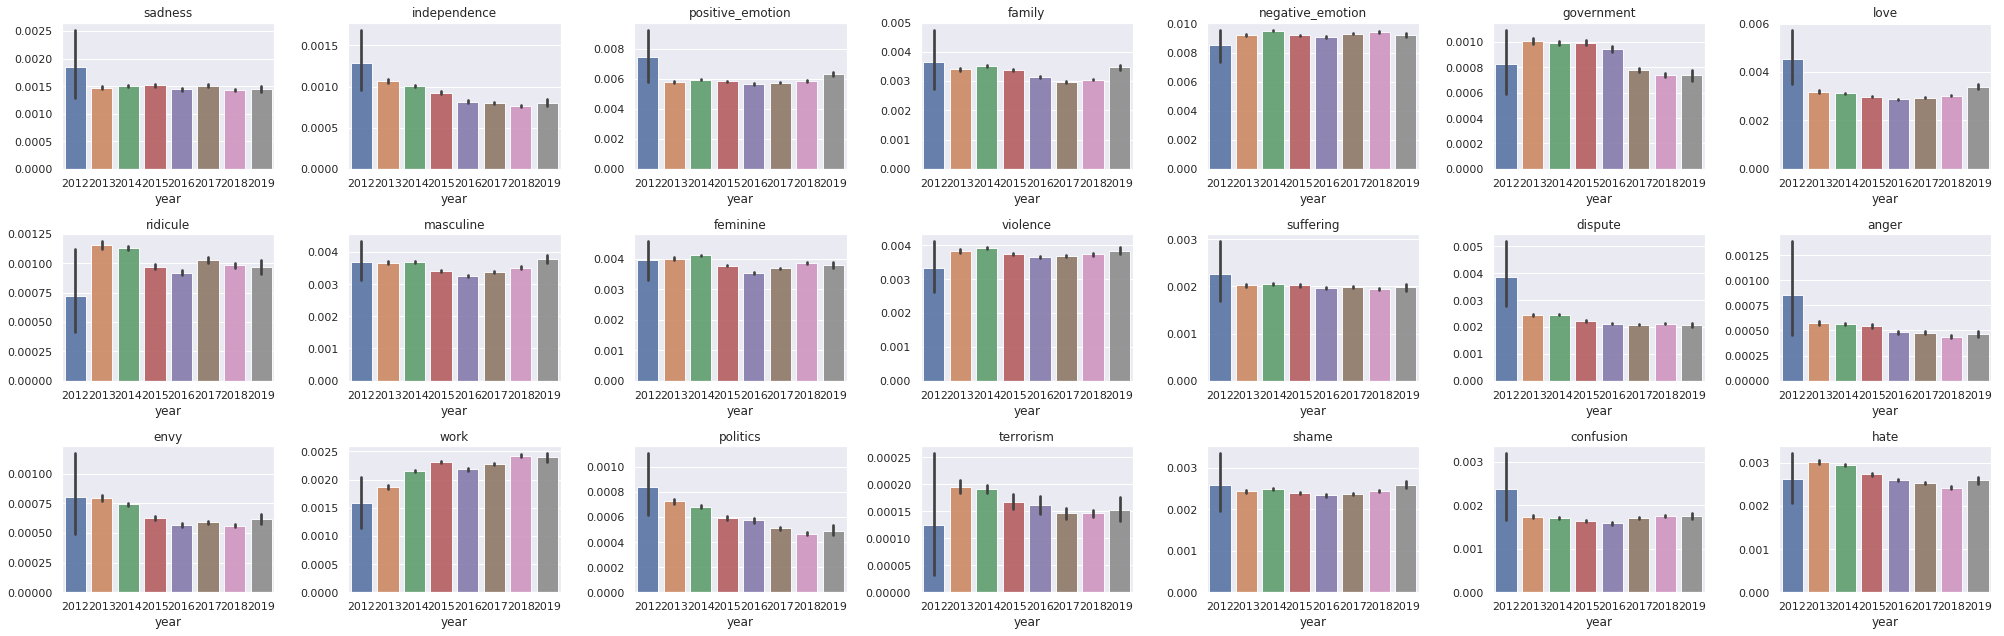

In [21]:
nr_rows = 3
nr_cols = 7

empath_list = ['sadness', 'independence', 'positive_emotion', 'family',
                'negative_emotion', 'government', 'love', 'ridicule',
                'masculine', 'feminine', 'violence', 'suffering',
                'dispute', 'anger', 'envy', 'work', 'politics',
                'terrorism', 'shame', 'confusion', 'hate']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

for r in range(0,nr_rows):
    for c in range(0, nr_cols):  
        col = r*nr_cols+c
        if col < len(empath_list):
            sns.set(style="darkgrid")
            sns.barplot(x="year", y=empath_list[col], alpha=0.9,ax = axs[r][c], data=RedPill_df)
            axs[r][c].set_ylabel('')
            axs[r][c].set_title(empath_list[col])

            
plt.tight_layout()
plt.savefig('RedPill_empath2.png')
plt.show()

In [15]:
Incel_df = df.loc[df['subreddit'].isin(Incel_subreddits)]

In [16]:
RedPill_df['community'] = 'RP'
MR_df['community'] = 'MR'
MGTOW_df['community'] = 'MGTOW'
Incel_df['community'] = 'Incel'
community_df = MR_df
community_df = community_df.append(RedPill_df, ignore_index=True)
community_df = community_df.append(MGTOW_df, ignore_index=True)
community_df = community_df.append(Incel_df, ignore_index=True)

/home/grad/ccomp/19/emanuelsilva/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/grad/ccomp/19/emanuelsilva/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/grad/ccomp/19/emanuelsilva/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

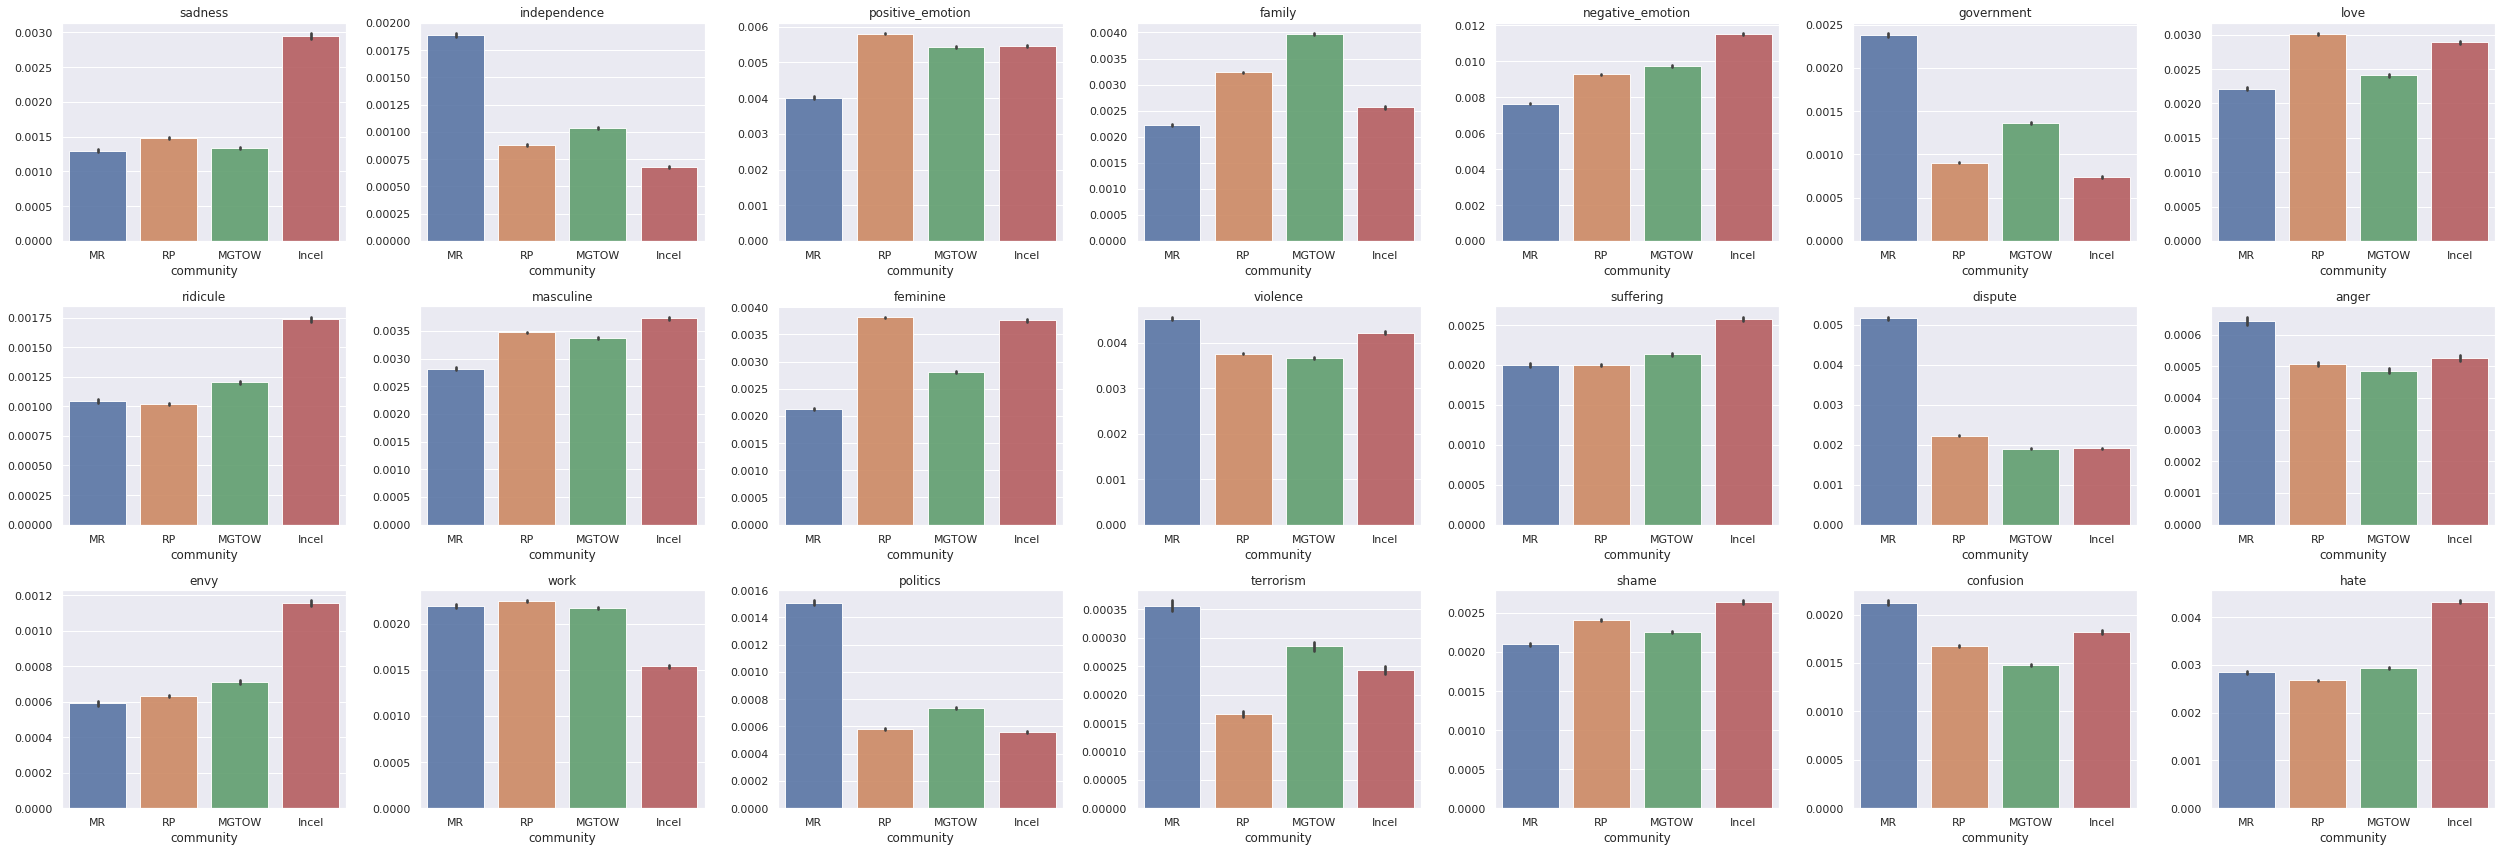

In [24]:
nr_rows = 3
nr_cols = 7

empath_list = ['sadness', 'independence', 'positive_emotion', 'family',
                'negative_emotion', 'government', 'love', 'ridicule',
                'masculine', 'feminine', 'violence', 'suffering',
                'dispute', 'anger', 'envy', 'work', 'politics',
                'terrorism', 'shame', 'confusion', 'hate']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*4), squeeze=False)

for r in range(0,nr_rows):
    for c in range(0, nr_cols):  
        col = r*nr_cols+c
        if col < len(empath_list):
            sns.set(style="darkgrid")
            sns.barplot(x="community", y=empath_list[col], alpha=0.9,ax = axs[r][c], data=community_df)
            axs[r][c].set_ylabel('')
            axs[r][c].set_title(empath_list[col])

            
plt.tight_layout()
plt.savefig('Communities_empath.png')
plt.show()

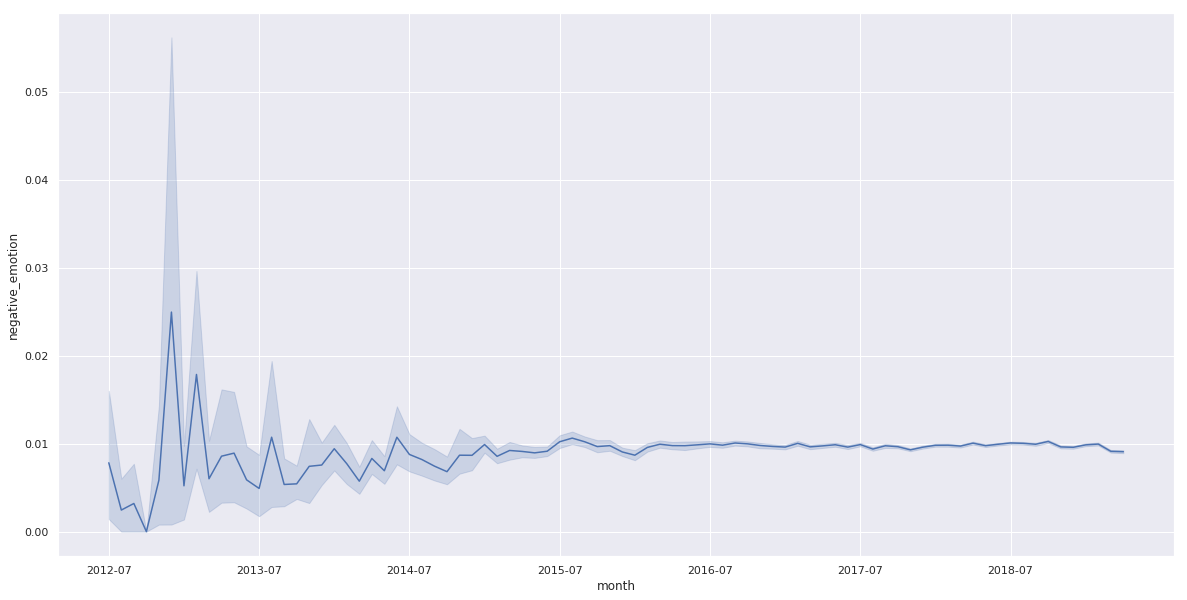

In [31]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="month", y="negative_emotion", data=MGTOW_df)
ax.set(xticks=list(MGTOW_df["month"].drop_duplicates()[::12]))
plt.show()